# Computer Assignment 3
# Discrete Time Signals

Kianoush Arshi<br>
810198438

## Table of Contents

* [Requirements](#Requirements)
* [Discrete Analysis](#Discrete-Analysis)
    * [The Signal](#The-Signal)
* [Discrete Sequence](#Discrete-Sequence)
    * [Circular Convolution](#Circular-Convolution)
        * [Computations](#Computations)
* [Discrete Transforms](#Discrete-Transforms)
    * [Signal 1](#Signal-1)
    * [Signal 2](#Signal-2)
        * [Z Transform](#Z-Transform)
        * [Inverse Z Transform](#Inverse-Z-Transform)
        * [DFT](#DFT)
        * [DTFT](#DTFT)
        * [Normalized\Angular](#Normalized\Angular)

# Requirements

In [1]:
from lcapy import *
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

# Discrete Analysis

# The Signal

In this part, we'll analyse the following discrete signal:
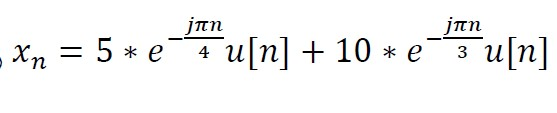

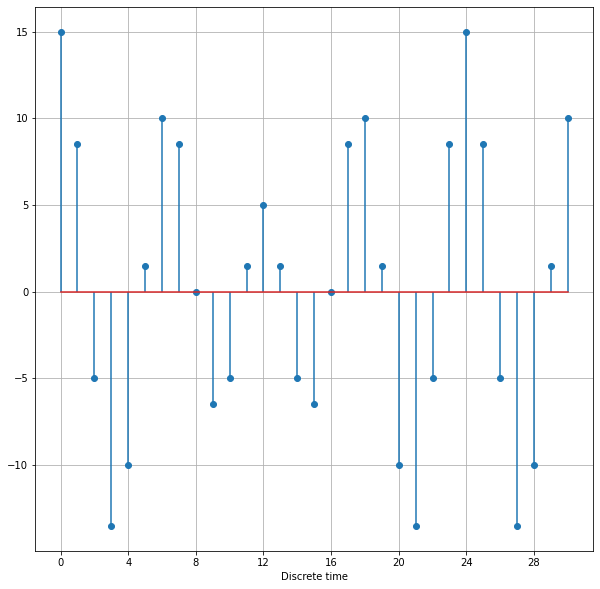

In [2]:
x_n = 5 * exp(-(j * pi* n)/4)*u(n) + 10 * exp(-(j * pi* n)/3)*u(n)
x_n.plot((0, 30), figsize=(10, 10))
plt.show()

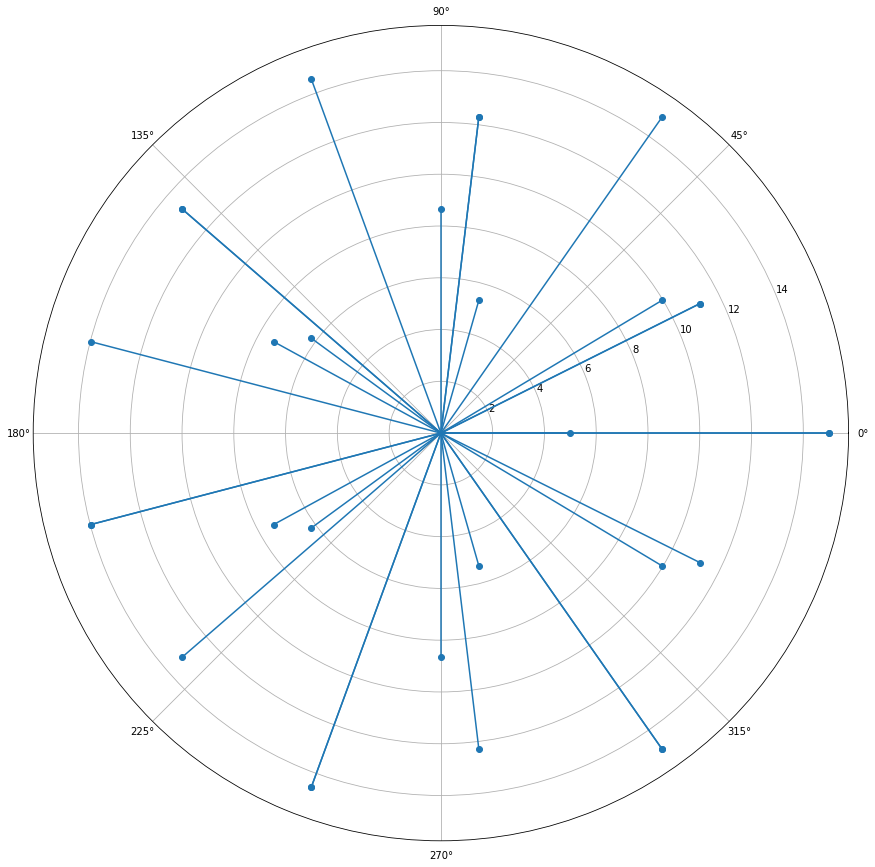

In [3]:
x_n.plot((0, 30), figsize=(15, 15), polar = True)
plt.show()

Based on the above plot, we can conclude that the maximum phase and value is for n = 22:

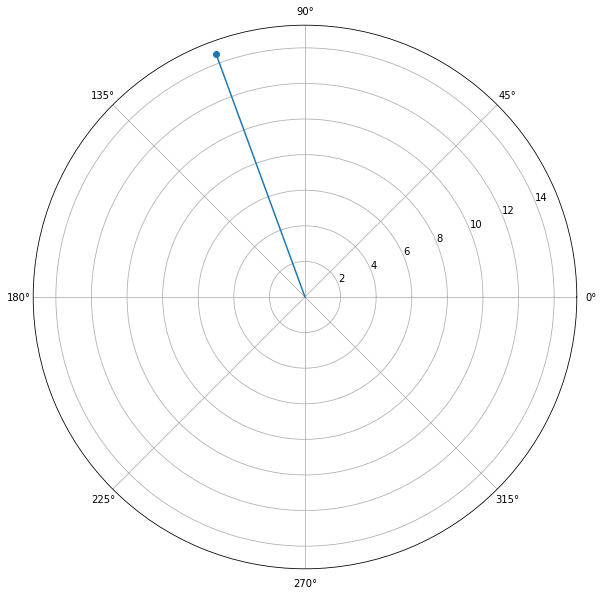

In [4]:
_n = 22 #22
x_n.plot((_n, _n), figsize=(10, 10), polar = True)
plt.show()

# Discrete Sequence

We'll be working on the sequences of the following signals:<br>
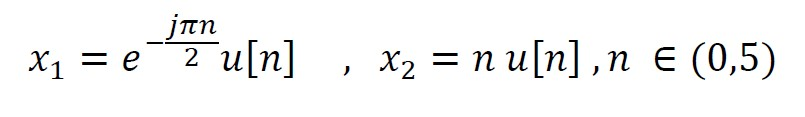

In [5]:
x_1 = exp(-(j * pi* n)/2)*u(n)
xs_1 = x_1.seq((0, 5))
xs_1

{_1, -ⅉ, -1, ⅉ, 1, -ⅉ}

In [6]:
x_2 = n*u(n)
xs_2 = x_2.seq((0, 5))
xs_2

{_0, 1, 2, 3, 4, 5}

# Circular Convolution

circular(cyclic) convolution is is the convolution of two periodic functions that have the same period.<br>
The DTFT of the product of two discrete sequences is the periodic convolution of the DTFTs of the individual sequences.<br>
Circular convolution plays an important role in maximizing the efficiency of a certain kind of common filtering operation.<br>
For discrete sequences, and a parameter N, we can write a circular convolution of aperiodic functions h and x as:<br>
![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/4d49c81da094cd54509001dea3b0a1f5e2751d6a)

In [7]:
xs_3 = xs_1 + xs_1
xs_3

{_1, -ⅉ, -1, ⅉ, 1, -ⅉ, 1, -ⅉ, -1, ⅉ, 1, -ⅉ}

In [8]:
xs_4 = seq([np.dot(xs_3.as_array()[5-m:11-m], xs_2) for m in range(6)])
xs_4

{_3 + 2⋅ⅉ, -2 + ⅉ, -1 - 6⋅ⅉ, 6 - 7⋅ⅉ, 7 - 2⋅ⅉ, 2 - 3⋅ⅉ}

## Computations

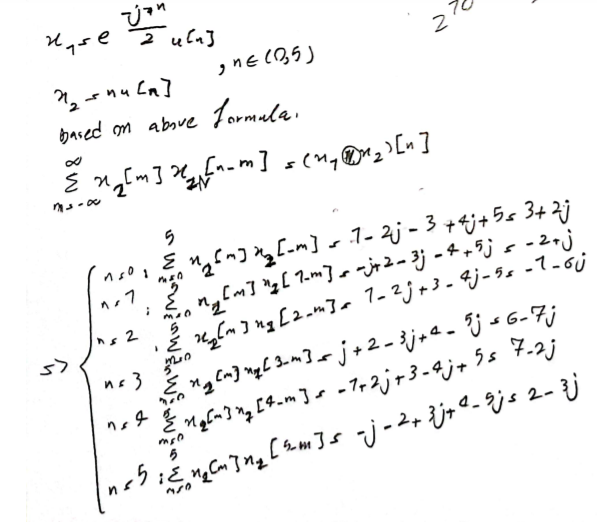

# Discrete Transforms


## Signal 1
We'll be working with the following signal:<br> 
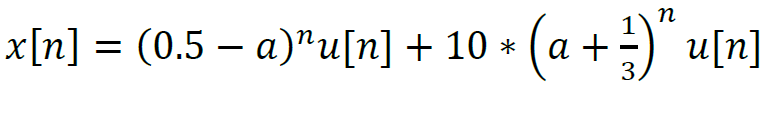

In [9]:
a = symbol('a')
x_n = (0.5 - a) ** n * u(n) + 10 * (a + 1/3) ** n * u(n)

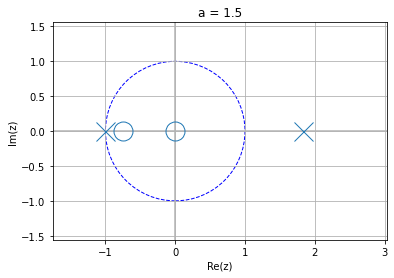

In [10]:
# Now let's check the signal in some values:

a_values = [1, 1.5, 3]

for i in a_values:
    y_n = x_n.subs({'a' : i})
    Y = y_n.ZT()
    
    Y.plot()
    plt.title("a = {}".format(i))
    plt.show()

We can see that by increasing a, the poles and zeroes become more scattered. All the points position change in each a except for zero point. This is obvioues since no matter what a we input the signal with, there will be a 0 point in z=0 since in our Z transform numerator we have z.

## Signal 2

Now, let's check another signal:<br>
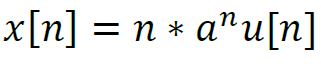

In [11]:
a = symbol('a')
x_n = n * a ** n * u(n)

### Z Transform

In [12]:
X = x_n.ZT()
X.expr

$$x[n] = na^nu[n] => Z\{a^n u[n]\} = \frac{1}{1-az^{-1}}$$
$$(\text{Differentiation in z-Domain property})=> -z\frac{dX(Z)}{dz}$$
$$=> X(z) = -z(1-az^{-1})' = \frac{az^{-1}}{(1-az^{-1})^2}$$

### Inverse Z Transform

In [13]:
X(n).simplify().expr

### DFT

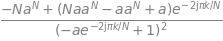

In [14]:
x_n.DFT().expr

### DTFT

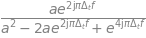

In [15]:
dtft = x_n.DTFT().expr
dtft

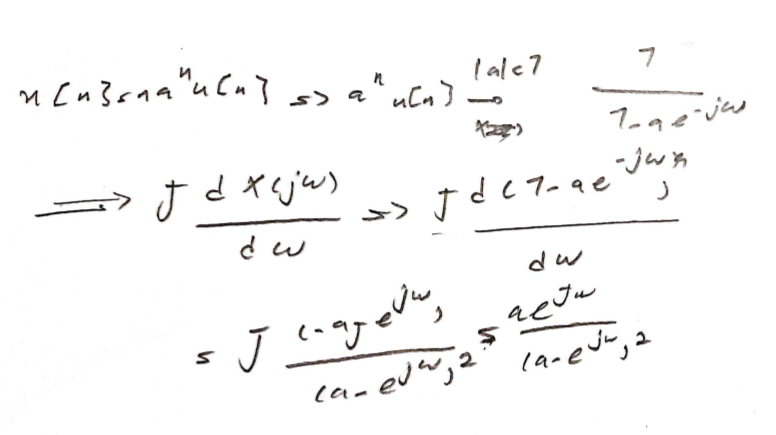

### Normalized\Angular

In [16]:
# Normalzied
n_dtft = x_n.DTFT(F)
n_dtft.expr

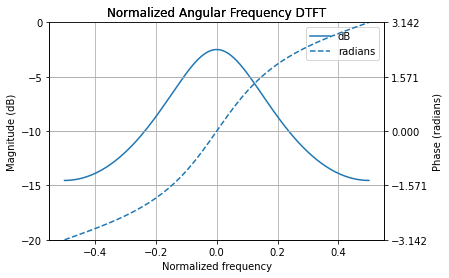

In [17]:
n_dtft = n_dtft.subs({'a' : 3})
n_dtft.plot(title="Normalized Angular Frequency DTFT")
plt.show()

In [18]:
# Normalized angular
na_dtft = x_n.DTFT(Omega)
na_dtft.expr

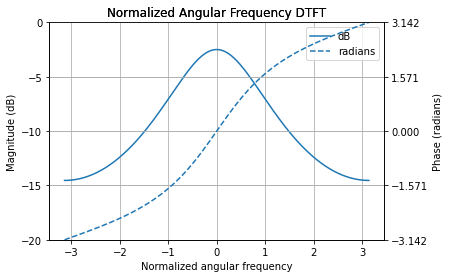

In [19]:
na_dtft = na_dtft.subs({'a' : 3})
na_dtft.plot(title="Normalized Angular Frequency DTFT")
plt.show()